**Modules**

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path

**Create Linear Regression Model by using Equation**

In [ ]:
# Define/Intialize the Weights & Bias
Weights = 0.7
Bias    = 0.3

# Create the X Dataset
X = torch.arange(start = 0, end = 1, step = 0.02).unsqueeze(dim = 1)

# Create the Y Dataset with Linear Regression
Y = Bias + Weights * X

In [ ]:
# Split the Dataset into Training and Testing
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.10 , random_state = 42)

# Display the Lenght of the Training/Testing Data
print(f"The Lenght of the X Train is : {len(x_train)}")
print(f"The Lenght of the Y Train is : {len(y_train)}")
print(f"The Lenght of the X Test  is : {len(x_test)}")
print(f"The Lenght of the Y Test  is : {len(y_test)}")

The Lenght of the X Train is : 45
The Lenght of the Y Train is : 45
The Lenght of the X Test  is : 5
The Lenght of the Y Test  is : 5


In [ ]:
# Define the Function that Visualization the Result
def plot_data(xtrain = x_train , ytrain = y_train , xtest = x_test , ytest = y_test , prediction = None):
  # Display the Training Data
  plt.scatter(xtrain , ytrain , c = "b" , s = 4 , label = "Training Dataset")
  # Display the Testing Data
  plt.scatter(xtest  , ytest  , c = "g" , s = 4 , label = "Testing Dataset")
  # Display the Prediction Data
  if prediction is not None:
    plt.scatter(xtest , prediction , c = "r" , s = 4 , label = "Prediction Dataset")
  
  plt.legend(prop = {"size" : 8})

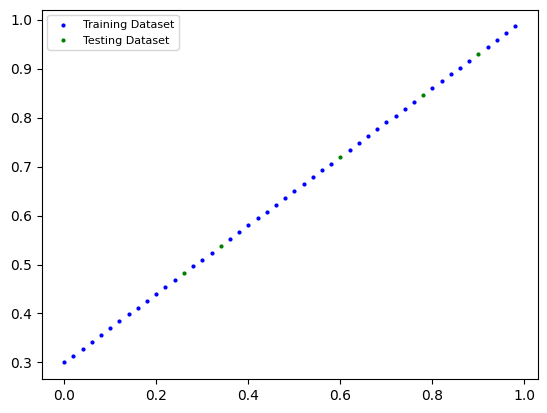

In [ ]:
# Visualization the Training and Testing Dataset
plot_data()

**Create the Linear Regression Model with Pytorch Module V1**

In [ ]:
# Create the Class of the Linear Regression Model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Define/Instialization the Weights and Bias
    self.Weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype = torch.float))
    self.Bias    = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    
  # Define the Forward Propagation
  def forward(self , x: torch.Tensor):
    # Define the Linear Regression Equation
    return self.Bias + self.Weights * x

In [ ]:
# Set the Manual Seed
torch.manual_seed(42)

# Create the Object of the LinearRegressionModel
model_0 = LinearRegressionModel()

# Display the Parameters of the Linear Regression Model
print(list(model_0.parameters()) , end = "\n\n")

# Display the Parameters of the Linear Regression Model in Dictionary format
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]

OrderedDict([('Weights', tensor([0.3367])), ('Bias', tensor([0.1288]))])


In [ ]:
# Predict the Result with Linear Regression Model
model_0.eval()

with torch.inference_mode():
  y_pred = model_0(x_test)

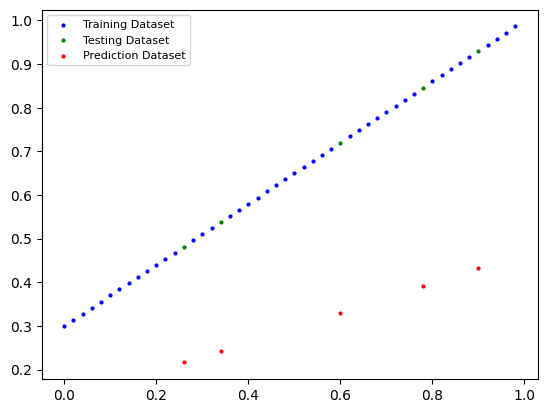

In [ ]:
# Visualization the Training & Testing & Predicted Data
plot_data(prediction = y_pred)                            # This Model Version not perform Well

**Create the Linear Regression Model with Pytorch Module V2**

In [ ]:
# Create the Class of the Linear Regression Model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Define/Instialization the Weights and Bias
    self.Weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype = torch.float))
    self.Bias    = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    
  # Define the Forward Propagation
  def forward(self , x: torch.Tensor):
    # Define the Linear Regression Equation
    return self.Bias + self.Weights * x

In [ ]:
# Set the Manual Seed
torch.manual_seed(42)

# Create the Object of the LinearRegressionModel
model_1 = LinearRegressionModel()

# Display the Parameters of the Linear Regression Model
print(list(model_1.parameters()) , end = "\n\n")

# Display the Parameters of the Linear Regression Model in Dictionary format
print(model_1.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]

OrderedDict([('Weights', tensor([0.3367])), ('Bias', tensor([0.1288]))])


In [ ]:
# Setup the Loss Function
loss = nn.L1Loss()

# Setup the Optimizer Function
optimizer = torch.optim.SGD(params = model_1.parameters() , lr = 0.01)

In [ ]:
# Training and Testing Loop
epochs = 200
for epoch in range(epochs+1):

  # 1. Train the Model
  model_1.train()

  # 2. Predict the Result
  trainPredict = model_1(x_train)

  # 3. Calculate the Loss of Training Prediction Data
  lossTrain = loss(trainPredict , y_train)

  # 4. Optimizer zero_grad
  optimizer.zero_grad()

  # 5. Perform the Backward Propagation
  lossTrain.backward()

  # 6. Apply the Optimizer
  optimizer.step()

  model_1.eval() # of the all calculation that not usefull to evaluate the Model/Predict the Result
  with torch.inference_mode():
    # Predict the Result
    testPredict = model_1(x_test)

    # Calculate the Loss of Testing Prediction Data
    lossTest = loss(testPredict , y_test)

    if epoch % 10 == 0:
      print(f"Epochs : {epoch} | Train Loss : {lossTrain} | Test Loss : {lossTest}")

Epochs : 0 | Train Loss : 0.34574073553085327 | Test Loss : 0.3676895499229431
Epochs : 10 | Train Loss : 0.22265800833702087 | Test Loss : 0.24001598358154297
Epochs : 20 | Train Loss : 0.1057056114077568 | Test Loss : 0.11731840670108795
Epochs : 30 | Train Loss : 0.061234284192323685 | Test Loss : 0.058344293385744095
Epochs : 40 | Train Loss : 0.04850568249821663 | Test Loss : 0.04557226970791817
Epochs : 50 | Train Loss : 0.0429481565952301 | Test Loss : 0.03891906887292862
Epochs : 60 | Train Loss : 0.03789947181940079 | Test Loss : 0.03425252437591553
Epochs : 70 | Train Loss : 0.03286665305495262 | Test Loss : 0.02958596870303154
Epochs : 80 | Train Loss : 0.027829546481370926 | Test Loss : 0.02508598566055298
Epochs : 90 | Train Loss : 0.02279672585427761 | Test Loss : 0.020419394597411156
Epochs : 100 | Train Loss : 0.017763907089829445 | Test Loss : 0.015752840787172318
Epochs : 110 | Train Loss : 0.012728365138173103 | Test Loss : 0.01108628511428833
Epochs : 120 | Train Lo

In [ ]:
# Predict the Result with Linear Regression Model
model_1.eval()

with torch.inference_mode():
  y_pred = model_1(x_test)

In [ ]:
# Display the Parameters of the Model Linear Regression
print(list(model_1.parameters()))
print(model_1.state_dict())

[Parameter containing:
tensor([0.6965], requires_grad=True), Parameter containing:
tensor([0.3050], requires_grad=True)]
OrderedDict([('Weights', tensor([0.6965])), ('Bias', tensor([0.3050]))])


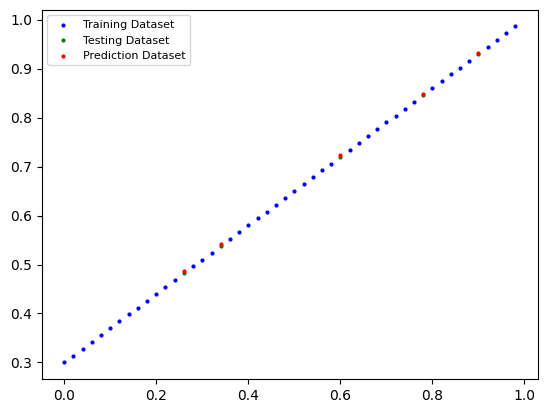

In [ ]:
# Visualization the Training & Testing & Predicted Data
plot_data(prediction = y_pred)                   

**Save and Load the Pytorch Model**

In [ ]:
# Create the Model PATH
MODEL_PATH = Path("Pytorch_model")
MODEL_PATH.mkdir(parents = True , exist_ok = True)

# Create Model Save PATH
MODEL_NAME = "pytorch_linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the Model (model.state_dict())
print(f"Svaing Model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict() ,  f = MODEL_SAVE_PATH)

Svaing Model to : Pytorch_model/pytorch_linear_regression_model.pth


In [ ]:
# Create the new Object of Linear Regression Model
model_2 = LinearRegressionModel()

# Load the Linear Regression Model
model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# Display the Parameters of the Load Model
print(list(model_2.parameters()) , end = "\n\n")
print(model_2.state_dict())

[Parameter containing:
tensor([0.6965], requires_grad=True), Parameter containing:
tensor([0.3050], requires_grad=True)]

OrderedDict([('Weights', tensor([0.6965])), ('Bias', tensor([0.3050]))])


**Predict the Results with Load Model**

In [ ]:
# Predict the Result with Linear Regression Model
model_2.eval()

with torch.inference_mode():
  y_pred = model_2(x_test)

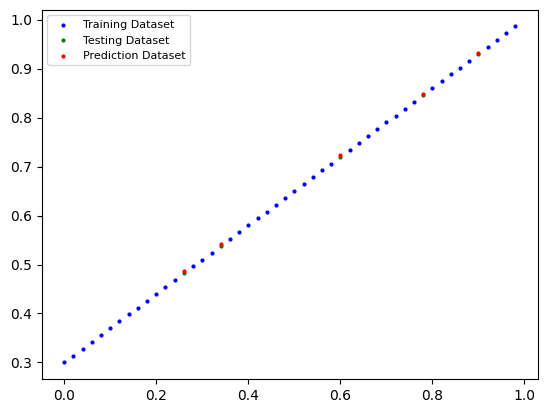

In [ ]:
# Visualization the Training & Testing & Predicted Data
plot_data(prediction = y_pred)                   